In [ ]:
Team 27: Sola Agogu, Daniel Bernal, Omar Ibarra, Chanel Lee, Dami Salami

Walkable Cities - Extended Analysis

Contents
1. Data review
2. Summary Statistics
3. Scatterplots and other univariate distributions
4. Heat Maps (Correlations)
5. Hypothesis Testing
6. Regression Analysis/ Modeling

In [22]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels.formula.api  as smf
import hvplot.pandas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pingouin                 as pg
import statsmodels.formula.api  as sm

In [6]:
# import wrangled dataset
walkable_cities = pd.read_csv("walkable-cities.csv")
walkable_cities

,place_code,city,state,pop_estimate_2021,state_code,city_state,city_state_code,place_state_code,geo_code,land_area_sqkm,...,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,3076,Auburn,Alabama,78564,AL,"Auburn, Alabama","Auburn, AL",3076AL,103076.0,157.084761,...,0.370857,79325.0,29770.0,48531.0,32556.0,0.231926,NaN,NaN,NaN,NaN
1,7000,Birmingham,Alabama,197575,AL,"Birmingham, Alabama","Birmingham, AL",7000AL,107000.0,380.801025,...,0.443224,58012.0,27211.0,36614.0,36193.0,0.270712,7.4,51.0,NaN,NaN
2,20104,Decatur,Alabama,57804,AL,"Decatur, Alabama","Decatur, AL",20104AL,120104.0,140.785624,...,NaN,NaN,NaN,NaN,31259.0,NaN,NaN,39.0,NaN,NaN
3,21184,Dothan,Alabama,71175,AL,"Dothan, Alabama","Dothan, AL",21184AL,121184.0,232.650562,...,0.425725,70513.0,31168.0,45088.0,31803.0,0.209933,5.3,NaN,NaN,NaN
4,35896,Hoover,Alabama,92589,AL,"Hoover, Alabama","Hoover, AL",35896AL,135896.0,124.490626,...,0.396602,124562.0,50046.0,99276.0,36193.0,0.059813,3.5,51.0,0.001231,0.020758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,66000,Racine,Wisconsin,77127,WI,"Racine, Wisconsin","Racine, WI",66000WI,5566000.0,40.080067,...,0.400443,60267.0,24591.0,47861.0,33541.0,0.221427,6.4,43.0,0.003773,0.012836
756,84250,Waukesha,Wisconsin,71256,WI,"Waukesha, Wisconsin","Waukesha, WI",84250WI,5584250.0,66.102904,...,0.437002,88781.0,38381.0,69533.0,34586.0,0.077860,NaN,43.0,0.000940,0.009683
757,85300,West Allis,Wisconsin,59484,WI,"West Allis, Wisconsin","West Allis, WI",85300WI,5585300.0,29.477371,...,NaN,NaN,NaN,NaN,34586.0,NaN,NaN,45.0,0.003547,0.028344
758,13150,Casper,Wyoming,58656,WY,"Casper, Wyoming","Casper, WY",13150WY,5613150.0,68.757037,...,NaN,NaN,NaN,NaN,30785.0,NaN,NaN,42.0,0.002881,0.028590


In [7]:
# reviewing a list of the dataset's columns
display(walkable_cities.columns)

Index(['place_code', 'city', 'state', 'pop_estimate_2021', 'state_code',
       'city_state', 'city_state_code', 'place_state_code', 'geo_code',
       'land_area_sqkm', 'pop_per_km2', 'county_state', 'median_age', 'male',
       'female', 'white_alone', 'black_or_african_american_alone',
       'american_indian_and_alaska_native_alone', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander_alone',
       'some_other_race_alone', 'two_or_more_races', 'hispanic_or_latino',
       'access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma',
       'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd',
       'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes',
       'ghlth', 'highchol', 'kidney', 'lpa', 'mammouse', 'mhlth', 'obesity',
       'phlth', 'sleep', 'stroke', 'teethlost', 'cumulative_confirmed',
       'cumulative_deceased', 'walk_score', 'bike_score', 'drive_commute',
       'public_transit_commute', 'walk_commute', 'bike_comm

From our visual review of the dataset and columns, we can see that our variables include:
 - walkability variables: walk_score and bike_score
 - race variables
 - health variables
 - age variables
 - crime variables
 - commuting variables
 - age variable
 - gender variables

In [8]:
#REVIEW
#Additional data wrangling
#uses the loc method to select the subset of rows and columns where the column names are not duplicated. 
walkable_cities = walkable_cities.loc[:,~walkable_cities.columns.duplicated()]
#removes the specified columns from the walkable_cities dataframe
walkable_cities.drop(walkable_cities.columns[[4,5,6,7,11]], axis=1, inplace=True)
walkable_cities

,place_code,city,state,pop_estimate_2021,geo_code,land_area_sqkm,pop_per_km2,median_age,male,female,...,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,3076,Auburn,Alabama,78564,103076.0,157.084761,500.137630,27.8,0.483186,0.516662,...,0.370857,79325.0,29770.0,48531.0,32556.0,0.231926,NaN,NaN,NaN,NaN
1,7000,Birmingham,Alabama,197575,107000.0,380.801025,518.840515,37.2,0.479291,0.514812,...,0.443224,58012.0,27211.0,36614.0,36193.0,0.270712,7.4,51.0,NaN,NaN
2,20104,Decatur,Alabama,57804,120104.0,140.785624,410.581694,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31259.0,NaN,NaN,39.0,NaN,NaN
3,21184,Dothan,Alabama,71175,121184.0,232.650562,305.930918,40.5,0.473565,0.527952,...,0.425725,70513.0,31168.0,45088.0,31803.0,0.209933,5.3,NaN,NaN,NaN
4,35896,Hoover,Alabama,92589,135896.0,124.490626,743.742746,38.9,0.504066,0.495923,...,0.396602,124562.0,50046.0,99276.0,36193.0,0.059813,3.5,51.0,0.001231,0.020758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,66000,Racine,Wisconsin,77127,5566000.0,40.080067,1924.323130,34.6,0.476954,0.523098,...,0.400443,60267.0,24591.0,47861.0,33541.0,0.221427,6.4,43.0,0.003773,0.012836
756,84250,Waukesha,Wisconsin,71256,5584250.0,66.102904,1077.955667,36.2,0.482654,0.517318,...,0.437002,88781.0,38381.0,69533.0,34586.0,0.077860,NaN,43.0,0.000940,0.009683
757,85300,West Allis,Wisconsin,59484,5585300.0,29.477371,2017.954722,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34586.0,NaN,NaN,45.0,0.003547,0.028344
758,13150,Casper,Wyoming,58656,5613150.0,68.757037,853.090863,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30785.0,NaN,NaN,42.0,0.002881,0.028590


For our main walkability variable, the frequency distribution in the histogram below shows a slight right skewness. We can explore it further by carrying out descriptive analysis.

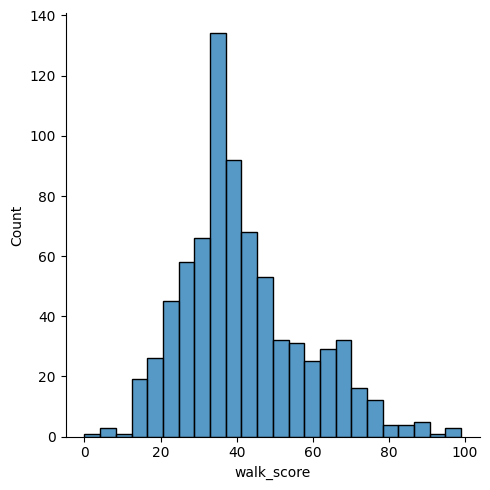

In [9]:
hist_walk = walkable_cities['walk_score']

# Plot a histogram of the "walk_score" column
sns.displot(hist_walk, kde=False)

In [10]:
# For review purposes, group the walk scores by state
pd.options.plotting.backend='hvplot'
walkable_cities.groupby('state')['walk_score'].mean().plot(kind='bar', width=1400, height=600, bins=100)

/home/daklus/.local/lib/python3.10/site-packages/holoviews/core/util.py:975: RuntimeWarning: invalid value encountered in cast
  arr = np.array(values)
/home/daklus/.local/lib/python3.10/site-packages/holoviews/core/util.py:975: RuntimeWarning: invalid value encountered in cast
  arr = np.array(values)


:Bars   [state]   (walk_score)

In [11]:
# Identify the city with highest walk score
pd.options.plotting.backend='hvplot'
walkable_cities.groupby('city')['walk_score'].mean().plot(kind='bar', bins=100, width=1600, height=600)

/home/daklus/.local/lib/python3.10/site-packages/holoviews/core/util.py:975: RuntimeWarning: invalid value encountered in cast
  arr = np.array(values)
/home/daklus/.local/lib/python3.10/site-packages/holoviews/core/util.py:975: RuntimeWarning: invalid value encountered in cast
  arr = np.array(values)


:Bars   [city]   (walk_score)

In [12]:
#New dataframe with walk score greater than 50
poss_walK_cities = walkable_cities.groupby('city').filter(lambda x: x['walk_score'].max() > 50)
poss_walK_cities.sort_values('walk_score')
poss_walK_cities

,place_code,city,state,pop_estimate_2021,geo_code,land_area_sqkm,pop_per_km2,median_age,male,female,...,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
15,27820,Glendale,Arizona,249630,427820.0,159.532413,1564.760385,36.1,0.501334,0.498654,...,0.362953,78837.0,28898.0,62910.0,37614.0,0.138265,6.9,122.0,0.003457,0.032380
24,73000,Tempe,Arizona,184118,473000.0,103.448358,1779.805920,29.0,0.525332,0.474620,...,0.419872,92446.0,39225.0,68662.0,37614.0,0.156047,6.5,122.0,0.004828,0.040300
36,562,Alameda,California,76362,600562.0,27.061952,2821.747670,40.6,0.488031,0.511838,...,0.396545,155556.0,63253.0,115468.0,50463.0,0.085409,6.5,45.0,0.002121,0.033773
37,884,Alhambra,California,81211,600884.0,19.764463,4108.940374,39.5,0.454397,0.545702,...,0.357365,88493.0,32274.0,72222.0,45536.0,0.157873,9.3,77.0,0.001982,0.021536
39,2000,Anaheim,California,345940,602000.0,130.206498,2656.856649,37.2,0.487900,0.512086,...,0.305278,104088.0,32827.0,81747.0,51843.0,0.108880,7.7,49.0,0.003238,0.023871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,70000,Tacoma,Washington,219205,5370000.0,128.759844,1702.432942,37.1,0.496718,0.503273,...,0.405187,95445.0,39179.0,77141.0,36832.0,0.096015,5.3,40.0,0.008430,0.052075
751,40775,La Crosse,Wisconsin,52185,5540775.0,56.210692,928.382095,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,33203.0,NaN,NaN,37.0,0.002338,0.035451
753,53000,Milwaukee,Wisconsin,569330,5553000.0,249.116031,2285.400894,32.3,0.483110,0.516883,...,0.408132,64459.0,26998.0,46637.0,34586.0,0.231416,7.0,45.0,0.013830,0.026517
755,66000,Racine,Wisconsin,77127,5566000.0,40.080067,1924.323130,34.6,0.476954,0.523098,...,0.400443,60267.0,24591.0,47861.0,33541.0,0.221427,6.4,43.0,0.003773,0.012836


In [13]:
#Identify only the cities with walk score over 70
poss_walk_sort = poss_walK_cities.groupby('city').mean().sort_values('walk_score')
#Other way: poss_walk_sort.groupby("city" ).apply(lambda x: x.sort_values("walk_score"))
posswalk_over = poss_walk_sort[['walk_score']].sort_values(by='walk_score', ascending=False)
posswalk_over.head(40)

/tmp/ipykernel_5075/4133079235.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  poss_walk_sort = poss_walK_cities.groupby('city').mean().sort_values('walk_score')


,walk_score
city,
Indianapolis (balance),99.0
Washington,98.0
Hoboken,97.0
Cambridge,90.0
San Francisco,89.0
Somerville,89.0
New York,88.0
Jersey City,87.0
Berkeley,85.0


In [14]:
# Identify the cities with walk score greater than 50
pd.options.plotting.backend='hvplot'
poss_walK_cities.groupby('city')['walk_score'].mean().plot(kind='bar', width=1400, height=600, bins=100)

/home/daklus/.local/lib/python3.10/site-packages/holoviews/core/util.py:975: RuntimeWarning: invalid value encountered in cast
  arr = np.array(values)
/home/daklus/.local/lib/python3.10/site-packages/holoviews/core/util.py:975: RuntimeWarning: invalid value encountered in cast
  arr = np.array(values)


:Bars   [city]   (walk_score)

In [15]:
# Identify only the cities with walk score less 70
posswalk_over = poss_walk_sort[['walk_score']].sort_values(by='walk_score', ascending=True)
posswalk_over.head(144)

,walk_score
city,
Albany,40.333333
Troy,40.500000
Springfield,44.600000
Rochester,45.500000
Westminster,50.000000
...,...
Champaign City township,70.000000
East Orange,70.000000
Lynn,70.000000


In [16]:
#New dataframe with walk score greater less than 50
no_walK_cities = walkable_cities.groupby('city').filter(lambda x: x['walk_score'].max() <= 50)
no_walK_cities.sort_values('walk_score')
no_walK_cities

,place_code,city,state,pop_estimate_2021,geo_code,land_area_sqkm,pop_per_km2,median_age,male,female,...,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,3076,Auburn,Alabama,78564,103076.0,157.084761,500.137630,27.8,0.483186,0.516662,...,0.370857,79325.0,29770.0,48531.0,32556.0,0.231926,NaN,NaN,NaN,NaN
1,7000,Birmingham,Alabama,197575,107000.0,380.801025,518.840515,37.2,0.479291,0.514812,...,0.443224,58012.0,27211.0,36614.0,36193.0,0.270712,7.4,51.0,NaN,NaN
2,20104,Decatur,Alabama,57804,120104.0,140.785624,410.581694,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31259.0,NaN,NaN,39.0,NaN,NaN
3,21184,Dothan,Alabama,71175,121184.0,232.650562,305.930918,40.5,0.473565,0.527952,...,0.425725,70513.0,31168.0,45088.0,31803.0,0.209933,5.3,NaN,NaN,NaN
4,35896,Hoover,Alabama,92589,135896.0,124.490626,743.742746,38.9,0.504066,0.495923,...,0.396602,124562.0,50046.0,99276.0,36193.0,0.059813,3.5,51.0,0.001231,0.020758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,48000,Madison,Wisconsin,269196,5548000.0,206.086955,1306.225326,32.3,0.494666,0.505208,...,0.460401,91365.0,42473.0,67270.0,38220.0,0.172020,3.2,42.0,0.003492,0.024012
754,60500,Oshkosh,Wisconsin,66607,5560500.0,69.983046,951.759087,35.3,0.515907,0.483898,...,0.428363,65856.0,27924.0,55446.0,32431.0,0.162400,2.8,NaN,NaN,NaN
756,84250,Waukesha,Wisconsin,71256,5584250.0,66.102904,1077.955667,36.2,0.482654,0.517318,...,0.437002,88781.0,38381.0,69533.0,34586.0,0.077860,NaN,43.0,0.000940,0.009683
758,13150,Casper,Wyoming,58656,5613150.0,68.757037,853.090863,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30785.0,NaN,NaN,42.0,0.002881,0.028590


In [54]:
# Identify the cities with walk score less than 50
pd.options.plotting.backend='hvplot'
no_walK_cities.groupby('city')['walk_score'].mean().plot(kind='bar', width=1600, height=600, bins=100)

:Bars   [city]   (walk_score)

In [55]:
# Set the maximum number of rows and columns displayed
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# Identify all NA values in the dataframe
na_values = walkable_cities.isna().sum()

# Print the resulting dataframe
display(na_values)

place_code                                            0
city                                                  0
state                                                 0
pop_estimate_2021                                     0
geo_code                                              4
land_area_sqkm                                        4
pop_per_km2                                           4
median_age                                          196
male                                                196
female                                              196
white_alone                                           5
black_or_african_american_alone                       5
american_indian_and_alaska_native_alone               5
asian_alone                                           5
native_hawaiian_and_other_pacific_islander_alone      5
some_other_race_alone                                 5
two_or_more_races                                     5
hispanic_or_latino                              

In [56]:
#Summary Statistics Table
walkable_cities.describe()

,place_code,pop_estimate_2021,geo_code,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,hispanic_or_latino,access2,arthritis,binge,bphigh,bpmed,cancer,casthma,cervical,chd,checkup,cholscreen,colon_screen,copd,corem,corew,csmoking,dental,depression,diabetes,ghlth,highchol,kidney,lpa,mammouse,mhlth,obesity,phlth,sleep,stroke,teethlost,cumulative_confirmed,cumulative_deceased,walk_score,bike_score,drive_commute,public_transit_commute,walk_commute,bike_commute,work_from_home,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
count,760.000000,7.600000e+02,7.560000e+02,756.000000,756.000000,564.000000,564.000000,564.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,727.000000,727.000000,727.000000,711.000000,711.000000,727.000000,727.000000,727.000000,727.000000,727.000000,711.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,711.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,733.000000,733.000000,760.000000,760.000000,392.000000,392.000000,392.000000,392.000000,392.000000,563.000000,563.000000,564.000000,564.000000,727.000000,564.000000,518.000000,681.000000,633.000000,633.000000
mean,42201.003947,1.646429e+05,2.451419e+06,135.344888,1589.308126,36.554787,0.492196,0.508244,0.530158,0.136474,0.010493,0.082841,0.002794,0.114198,0.121619,0.247203,16.091816,22.160316,16.813411,29.640366,63.776723,5.912311,9.669532,81.740096,5.808872,71.852476,85.620253,68.686726,5.922558,43.091678,36.957221,14.563618,63.510591,19.193329,10.319326,14.422283,29.804993,2.807497,22.557359,72.440371,14.361279,31.499656,9.835144,33.107153,2.842847,10.194223,0.497485,0.005581,41.485526,46.298684,73.461990,2.677041,2.746939,0.647194,18.683418,0.382859,97922.424512,37995.865248,73858.675532,38843.456671,0.135641,6.892085,47.157122,0.004210,0.025443
std,24175.783004,3.924743e+05,1.704521e+06,186.608511,1505.860211,4.354124,0.018344,0.017905,0.195627,0.153452,0.010476,0.107579,0.006175,0.108583,0.062234,0.205923,6.837126,3.107948,2.260885,3.786599,3.813131,0.633356,0.906589,2.511802,0.804584,4.604071,2.332350,6.368350,1.259170,6.783988,6.250192,3.496685,6.198783,3.092191,1.798349,3.359495,2.100245,0.334807,4.340178,3.874187,1.434712,5.274307,1.591837,3.330289,0.442021,2.556524,0.336419,0.004845,16.236795,12.495227,12.821877,4.037735,2.473717,1.060421,9.771837,0.049541,33448.610008,13202.716289,26481.199768,6538.581192,0.061697,2.587433,17.362578,0.003196,0.012229
min,0.000000,5.010400e+04,1.030760e+05,3.238030,93.047234,22.800000,0.427906,0.342966,0.025274,0.002961,0.001181,0.001917,0.000075,0.007337,0.024205,0.019868,5.600000,16.200000,8.700000,20.750000,53.050000,4.200000,7.800000,71.950000,4.300000,64.050000,78.550000,54.900000,3.750000,29.950000,24.450000,6.500000,42.550000,12.500000,6.300000,8.250000,23.650000,2.200000,12.350000,60.350000,10.350000,17.350000,6.250000,23.500000,2.050000,5.450000,0.022447,0.000384,0.000000,12.000000,21.600000,0.000000,0.200000,0.000000,2.500000,0.245462,49626.000000,17236.000000,32217.000000,29353.000000,0.017209,1.300000,15.000000,0.000298,0.005378
25%,21000.000000,6.490600e+04,6.745655e+05,49.981347,797.451711,33.900000,0.480277,0.497261,0.398436,0.030277,0.004162,0.023772,0.000479,0.035492,0.077712,0.089025,11.275000,19.750000,15.600000,26.300000,60.350000,5.450000,9.000000,80.275000,5.150000,68.150000,84.150000,62.450000,5.100000,38.600000,32.400000,11.750000,59.650000,16.700000,9.200000,11.900000,27.950000,2.550000,19.600000,69.450000,13.350000,28.300000,8.600000,31.000000,2.500000,8.150000,0.326561,0.002713,31.000000,38.000000,67.950000,0.600000,1.275000,0.100000,11.750000,0.352608,75498

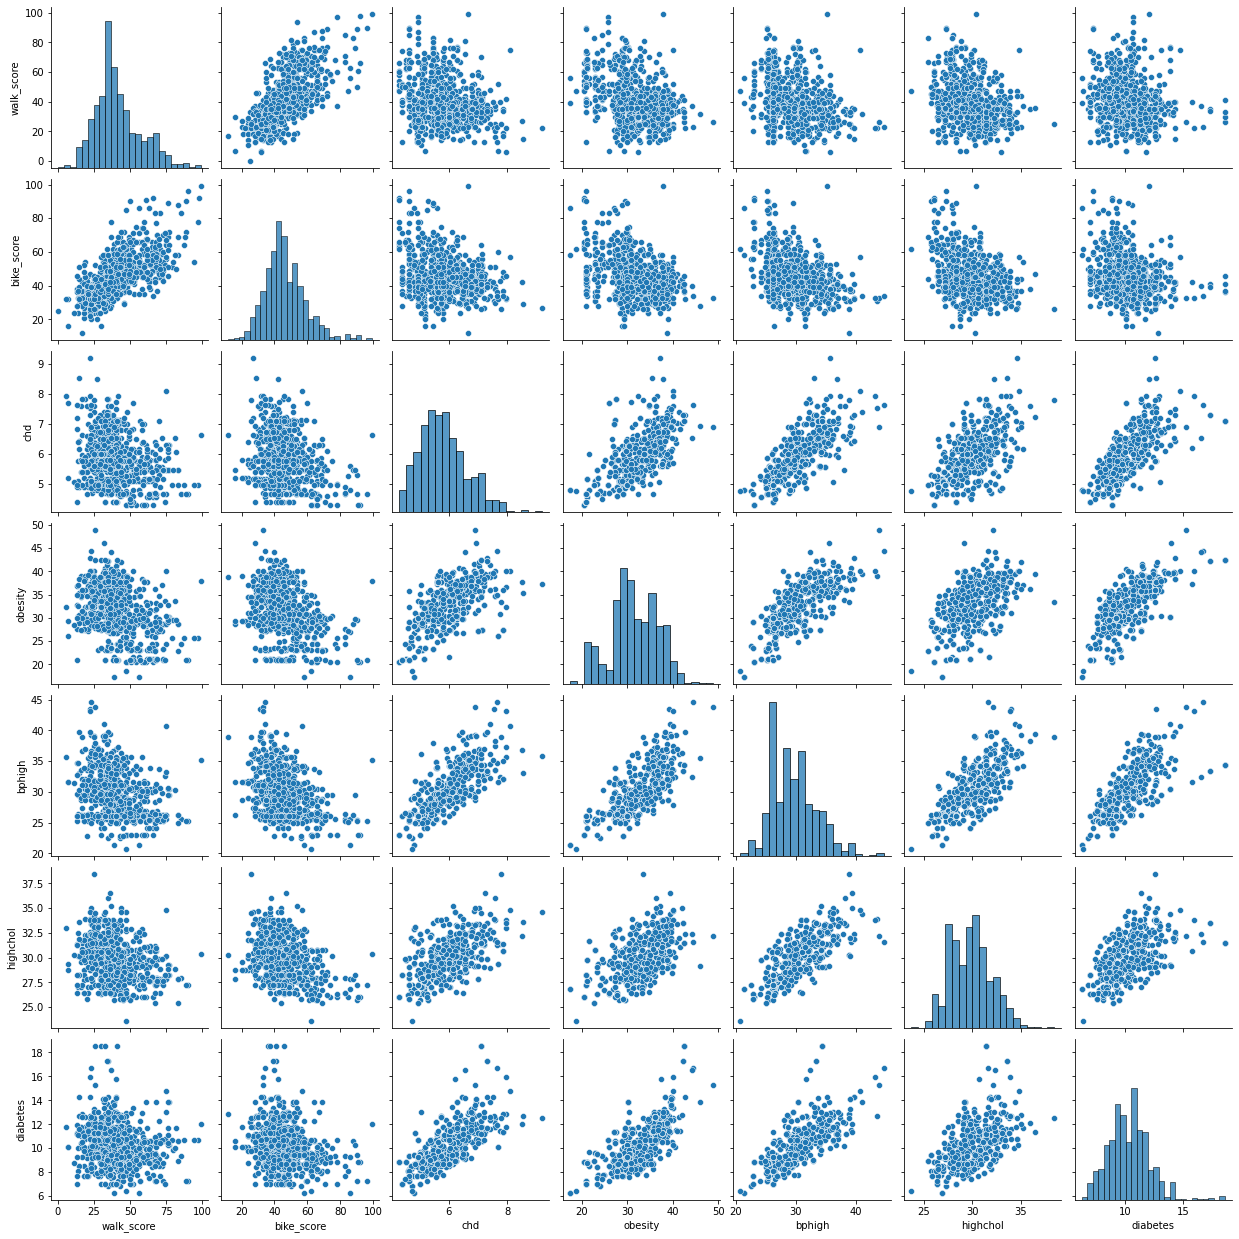

In [57]:
# Create a scatter plot matrix
sns.pairplot(walkable_cities[['walk_score', 'bike_score', 'chd', 'obesity', 'bphigh', 'highchol', 'diabetes']])

# Show the plot
plt.show()

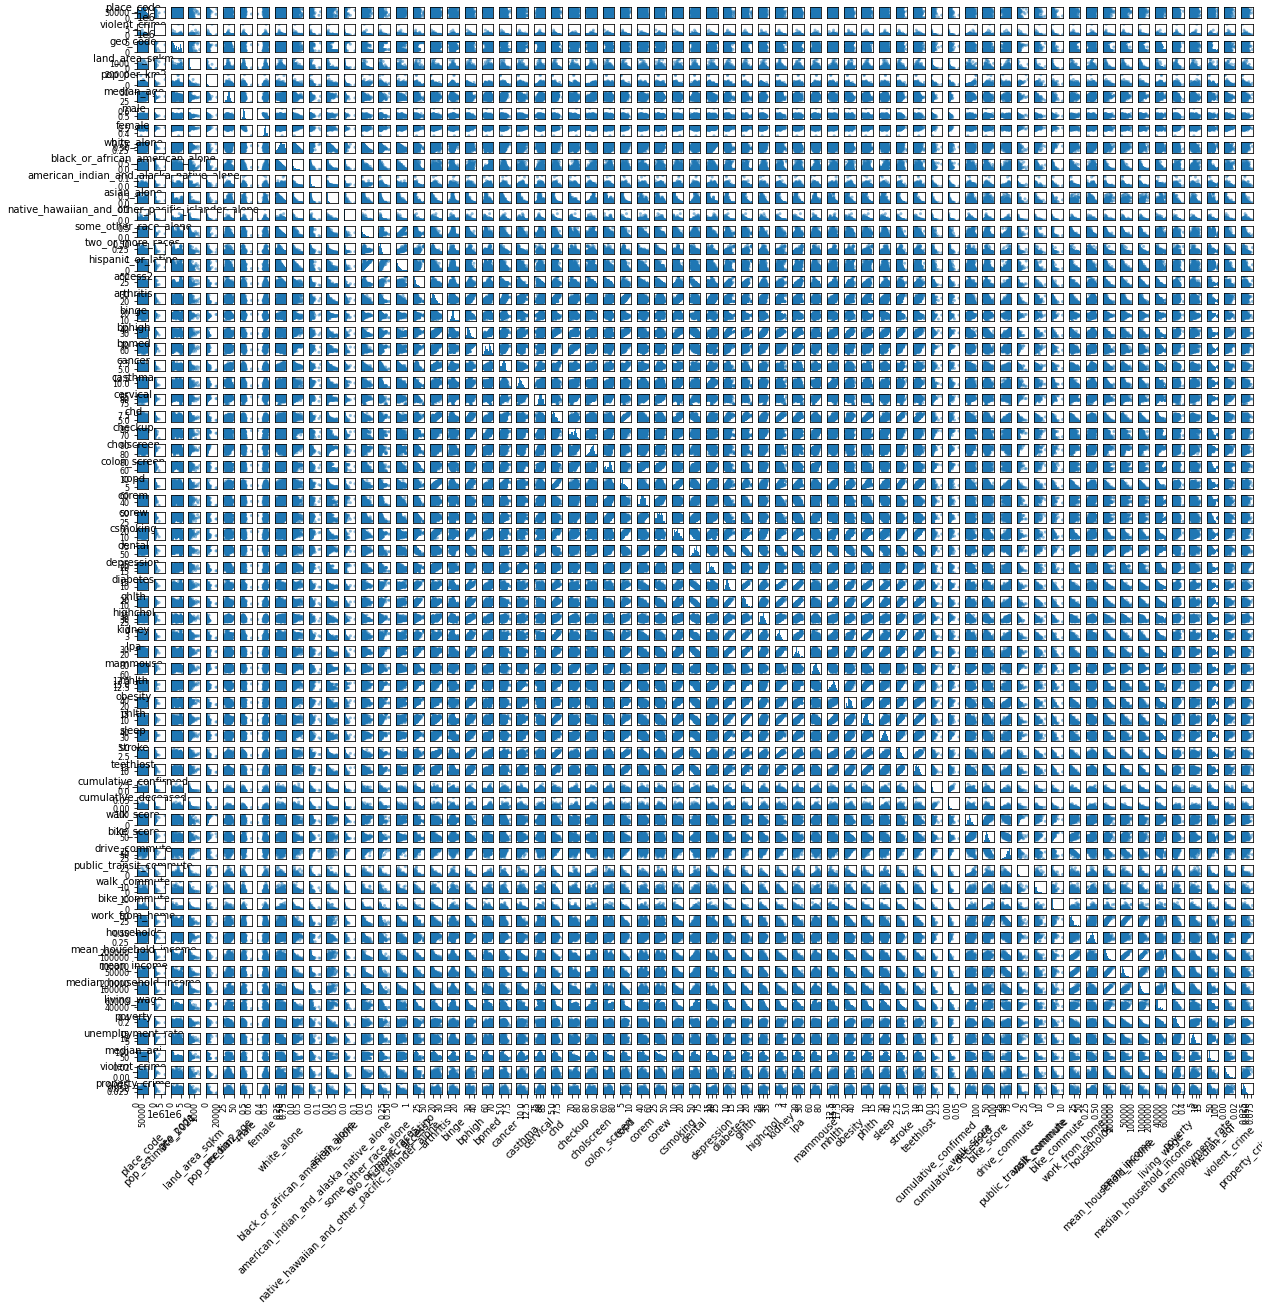

In [68]:
# First, create a scatter plot matrix
scatter_matrix = pd.plotting.scatter_matrix(walkable_cities, figsize=(20, 20))

# Rotate the x-axis labels on the scatter plot matrix
[s.xaxis.label.set_rotation(45) for s in scatter_matrix.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in scatter_matrix.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in scatter_matrix.reshape(-1)]

# Set the labels for the x-axis and y-axis
[s.xaxis.set_label_text(col) for col, s in zip(walkable_cities.columns, scatter_matrix.reshape(-1))]
[s.yaxis.set_label_text(col) for col, s in zip(walkable_cities.columns, scatter_matrix.reshape(-1))]

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()

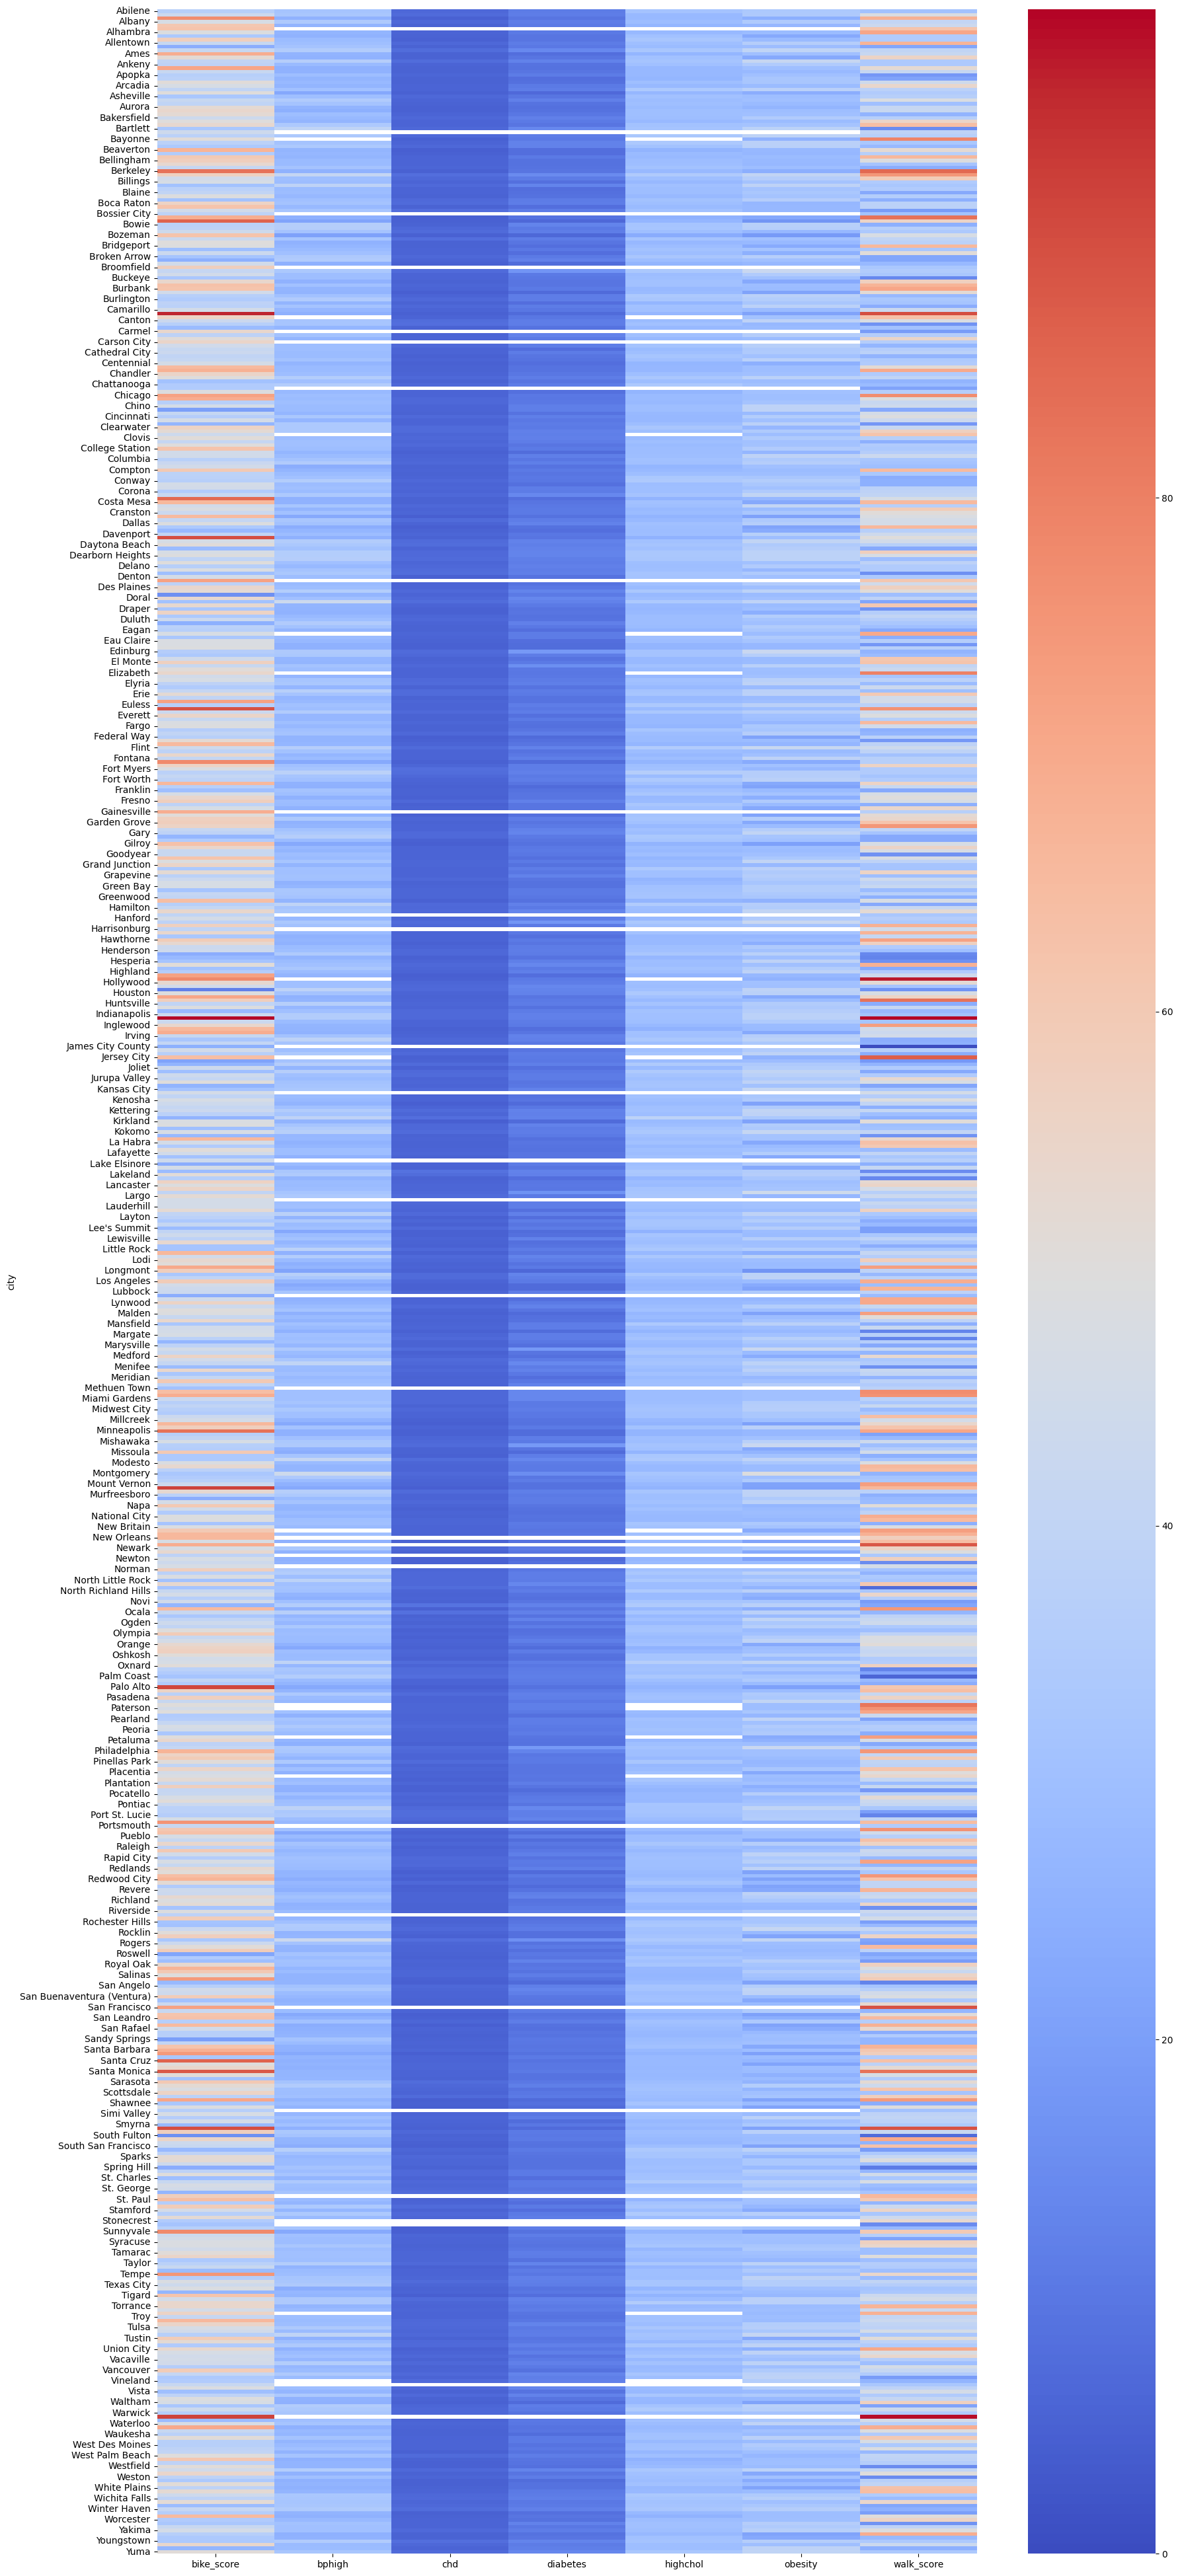

In [25]:
#Heat Maps
# Create a list only with the features needed
walkable_values = ['walk_score', 'bike_score', 'chd', 'obesity', 'bphigh', 'highchol', 'diabetes']
# Create a pivot table with the "city" column as the index and the "walk_score" column as the values
walkable_pivot_table = walkable_cities.pivot_table(index="city", values=walkable_values)

fig, ax = plt.subplots(figsize=(20, 50))
# Create a heatmap of the pivot table
sns.heatmap(walkable_pivot_table, cmap="coolwarm", ax=ax)

# Show the plot
plt.show()

In [59]:
#Group the cities in a dataframe by the "walk_score" column and create a heat map

# Create a new column with the "walk_score" values binned into ranges of 10
walkable_cities["walk_score_range"] = pd.cut(walkable_cities["walk_score"], bins=range(0, 110, 10))

# Create a pivot table with the "city" column as the index and the "walk_score_range" column as the values
walkable_pivot_table_1  = walkable_cities.pivot_table(index="city", values="walk_score_range")

# Create a heatmap of the pivot table
sns.heatmap(walkable_pivot_table_1)

# Show the plot
plt.show()

<ipython-input-59-bb9e895fda50>:7: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  walkable_pivot_table_1  = walkable_cities.pivot_table(index="city", values="walk_score_range")


ValueError: zero-size array to reduction operation fmin which has no identity

In [ ]:
# Check if the pivot table contains any non-NaN values
if walkable_pivot_table_1.notnull().values.any():
    # Create a heatmap of the pivot table
    sns.heatmap(walkable_pivot_table_1)

    # Show the plot
    plt.show()
else:
    print("The pivot table does not contain any non-NaN values.")

In [64]:
# Correlations

top_neg_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = True)[1:11]
top_pos_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = False)[1:11]
top_neg_corr_bike = walkable_cities.corr()['walk_score'].sort_values(ascending = True)[1:11]
top_pos_corr_bike = walkable_cities.corr()['walk_score'].sort_values(ascending = False)[1:11]


<ipython-input-64-667168bf25f2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_neg_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = True)[1:11]
<ipython-input-64-667168bf25f2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_pos_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = False)[1:11]
<ipython-input-64-667168bf25f2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_neg_corr_bike = walkable_cities.corr()['walk_sc

In [65]:
#Top possitive correlations
top_pos_corr_walk

pop_per_km2               0.717293
bike_score                0.669675
public_transit_commute    0.624452
living_wage               0.456153
walk_commute              0.412196
some_other_race_alone     0.377455
unemployment_rate         0.319987
bike_commute              0.294994
hispanic_or_latino        0.282338
violent_crime             0.244624
Name: walk_score, dtype: float64

In [66]:
#Top negative correlations
top_neg_corr_walk

obesity       -0.364952
bphigh        -0.341471
depression    -0.335364
white_alone   -0.318726
highchol      -0.316193
csmoking      -0.301707
arthritis     -0.300755
corem         -0.243192
chd           -0.239847
copd          -0.219883
Name: walk_score, dtype: float64

In [67]:
# Hypothesis Testing and model

# Create a multiple linear regression model with the dependent variable and the independent variables
model = smf.ols('walk_score ~ bike_score + chd + obesity + bphigh + highchol + diabetes', data=walkable_cities).fit()

# Dependent variable - 'walk_score'
# Independent variables - 'bike_score', 'chd', 'obesity', 'bphigh', 'highchol', 'diabetes'

# Print the summary of the model
print(model.summary())

# Define the null and alternate hypotheses
null_hypothesis = "There is no relationship between walk_score and the independent variables"
alternate_hypothesis = "There is a relationship between walk_score and the independent variables"

# Perform the F-test
f_test = model.f_test(np.identity(len(model.params)))

# Print the p-value of the F-test
print(f"p-value = {f_test.pvalue:.4f}")

# Interpret the results
if f_test.pvalue < 0.05:
    print("Reject the null hypothesis")
    print(alternate_hypothesis)
else:
    print("Fail to reject the null hypothesis")
    print(null_hypothesis)

                            OLS Regression Results                            
Dep. Variable:             walk_score   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     106.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.39e-95
Time:                        14:02:51   Log-Likelihood:                -2717.8
No. Observations:                 711   AIC:                             5450.
Df Residuals:                     704   BIC:                             5482.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.4468      7.285      3.218      0.0

In [63]:
#Linear Regression model

walkable_cities_1 = walkable_cities.loc[walkable_cities['walk_score'] >= 0, walkable_values]

type(walkable_cities_1)


pandas.core.frame.DataFrame

In [64]:


# Split the dataframe into two groups
#from sklearn.preprocessing import StandardScaler

greater_than_50 = walkable_cities_1[walkable_cities_1['walk_score'] > 50]

less_than_or_equal_to_50 = walkable_cities_1[walkable_cities_1['walk_score'] <= 50]

# Define the features and target variable
X = greater_than_50.drop(columns='walk_score')
y = greater_than_50['walk_score']

# check the shape of greater_than_50 dataframe
print(greater_than_50.shape)

# check if walk_score column exists in the dataframe
print(greater_than_50.columns)

#check if there are any missing value in the dataframe
print(greater_than_50.isnull().sum())

# check if all columns are numeric
print(greater_than_50.dtypes)


(187, 7)
Index(['walk_score', 'bike_score', 'chd', 'obesity', 'bphigh', 'highchol',
       'diabetes'],
      dtype='object')
walk_score     0
bike_score     0
chd            9
obesity        9
bphigh        24
highchol      24
diabetes       9
dtype: int64
walk_score      int64
bike_score      int64
chd           float64
obesity       float64
bphigh        float64
highchol      float64
diabetes      float64
dtype: object


In [65]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Drop missing values using dropna()
X_train.dropna()
X_test.dropna()

# Check the shape of the X_train variable
print(X_train.shape)

# Check if X_train is empty
if X_train.shape[0] == 0:
    print("X_train is empty.")

# Print the first 5 rows of X_train
print(X_train.head())

print(X_train.dtypes)

(149, 6)
     bike_score   chd  obesity  bphigh  highchol  diabetes
331          72  5.45    29.85   29.50     28.25     10.25
188          42  4.55    21.20   24.15     29.75      8.85
405          48  6.05    27.40   30.05     28.10      8.70
104          46  5.10    23.00   25.60     30.80      9.60
432          52  5.60    34.60   30.35     30.55      9.85
bike_score      int64
chd           float64
obesity       float64
bphigh        float64
highchol      float64
diabetes      float64
dtype: object


In [66]:
from sklearn.impute import SimpleImputer

# Create an imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training set
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test set
X_test_imputed = imputer.transform(X_test)

# Scale and normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize the model
reg = LinearRegression()

# Train the model on the training set
reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test_scaled)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared value: {:.2f}".format(r2))

Mean Squared Error: 69.80
R-squared value: 0.24
